### Lesson 1 Welcome to MSE 3114

<hr style="height: 3.0px"/>

Welcome back!  I hope you had some time to play around with Python over the summer.  If not, you will probably feel like you are starting all over again.  If that is the case, please take a look at  [Getting Started with Python](https://www.linkedin.com/learning/python-quick-start) for a refresher.  Your cheat sheet notebooks should also help you.  

### General Comments 

> 1. Make sure your homework is formatted nicely using markdown cells and different headers as appropriate.  Use the lesson files as an example of this.  
> 2. When using variable names in your homework make sure they make sense.  This means you will often have to change them from the names used in lesson examples.  For example, if the lesson import stress data from an excel file and uses the variable "stress" or $\sigma$ but your homework requires you to import time data change this variable to "time" or "t" etc.  
> 3. All unnecessary code and outputs should be removed before the homework is turned in.  
> 4. Recall when working through a lesson, you should try changing parameters to see what the code is doing.  Don't treat the example codes I use as a black box.  You are expected to know what every line is doing.  
> 5. If you cut and paste code from the lesson, but don't change variable names or remove unnecessary lines / procedures I will take off points.  Sorry.

>**Week 1 Learning objectives**
>* Be able to reinstall Jupyter (Anaconda build) 
>* Be able to import your own function definitions stored in a *.py file into a Jupyter notebook
>* Be able to import and excel file and plot
 

**First things first:**  Uninstall Anaconda from your machine.  

Now reinstall a new version of Anaconda:

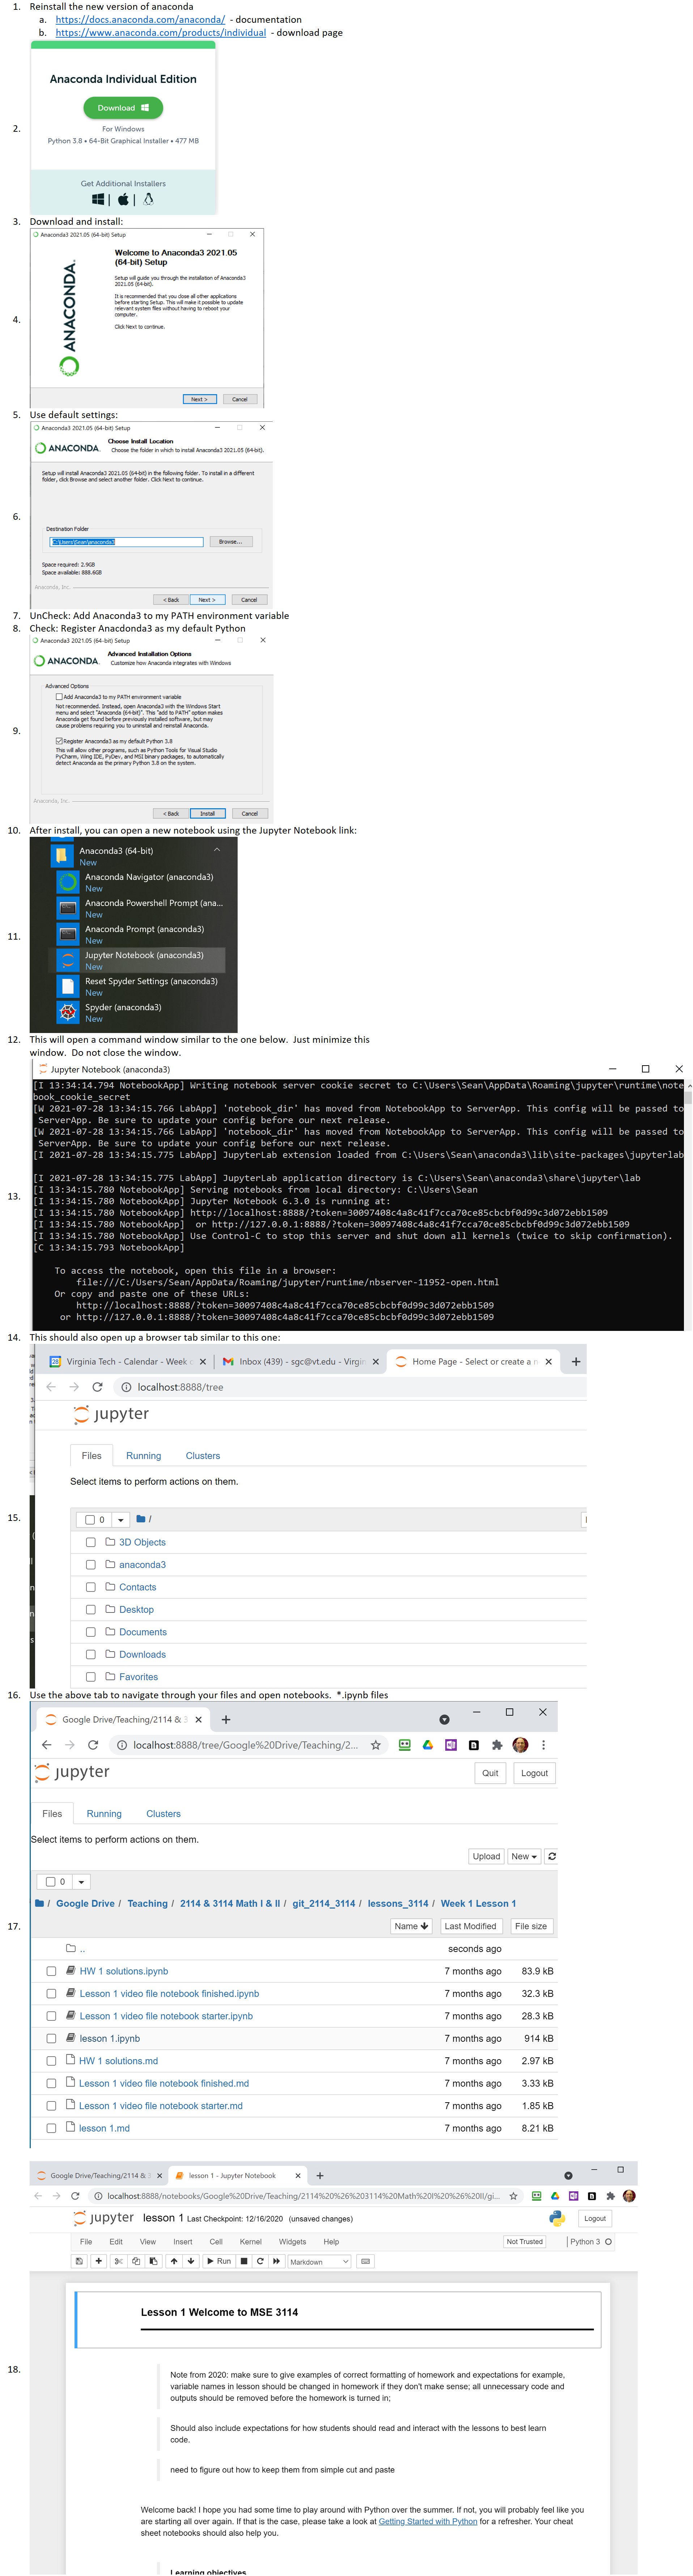

>In your new notebook, import the data from **Al7075_out.xlsx** and plot a stress vs strain curve.  Make sure you label your axes.  Plot your points as blue triangles.  

Were you able to successfully create and run a new jupyter notebook using your Cheat Sheet notebook from 2114?  **If not, fix it now.**  The cheat sheet won't do you any good later if you can't quickly get up to speed after only 3 months off.   

>Take a look at lesson 3 from 2114 located in Canvas. You won't need to do all of the manipulation we did in this lesson.  You just need to plot the correct columns in Al7075_out.xlsx.  I've already added a column for stress and one for strain.  

If you were, then awesome! 
<div>
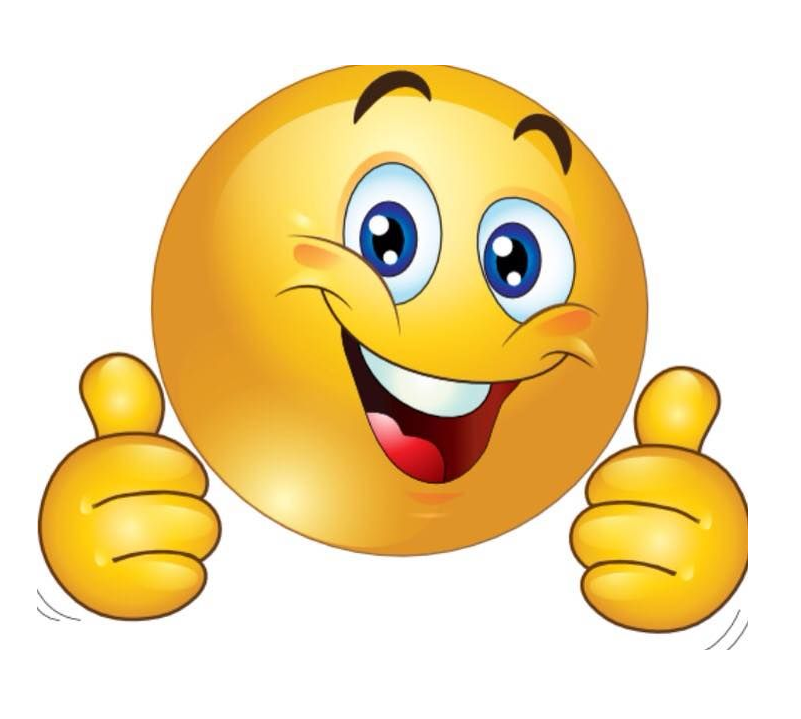
</div>

### Let's look at how to import your own functions into a new jupyter notebook

The steps are as follows:
1. Write your own function in a jupyter notebook to make sure it works  
2. Copy the function and paste into a text file using notepad  
3. Save the file with a ".py" extension 

When dealing with matrices, you will want to use the numpy.linalg package.  You can read the documentation here: https://numpy.org/doc/stable/reference/routines.linalg.html  

Let's say we want to find the volume of the unit cell in a given crystal structure and we are given the lattice parameters.  If this was a cubic unit cell of edge length "a", then the volume would just be $a^3$.  

What if our unit cell was triclinic with parameters a, b, c, $\alpha$, $\beta$, $\gamma$ ?  This is where we need the metric tensor, g, defined as: 

$$ g=\begin{bmatrix}a^{2} & ab \cos{(\gamma)}&ac \cos (\beta) \\ab \cos(\gamma) & b^2 & bc \cos (\alpha) \\ ac  \cos(\beta) & bc \cos(\alpha)&c^2 \end{bmatrix}$$

The unit cell volume will then just be the square root of the determinate of g,  $\sqrt{\det(g)}$



In [1]:
# let's start by importing numpy.  We will need this for the functions: array, cos, det, and rad2deg
import numpy as np

In [2]:
# We want to work out the form of our metric tensor using variables but the array needs numbers so we will 
# use a simple for loop to replace our variables with numbers.  This looks like:

for a,b,c,alpha,beta,gamma in [[1,2,3,90,90,90]]:
    
    print(
        np.array([
        [a*a, a*b*np.cos(gamma), a*c*np.cos(beta)],
        [b*a*np.cos(gamma), b*b, b*c*np.cos(alpha)], 
        [c*a*np.cos(beta),c*b*np.cos(alpha),c*c]
                ])
        )
          
# I tried to place a lot of spacing above so you could see how the brackets all align but we don't need to do this.  
# Below I'll remove most of the space.  
# Also notice our output isn't quite right.  The cos(90) should be zero. What is wrong?


[[ 1.         -0.89614723 -1.34422085]
 [-0.89614723  4.         -2.6884417 ]
 [-1.34422085 -2.6884417   9.        ]]


In [3]:
# Remember that trig functions expect radians not degrees so let's use the deg2rad() function to convert

for a,b,c,alpha,beta,gamma in [[1,2,3,90,90,90]]:
    
    print(np.array([[a*a, a*b*np.cos(np.deg2rad(gamma)), a*c*np.cos(np.deg2rad(beta))], 
                 [b*a*np.cos(np.deg2rad(gamma)), b*b, b*c*np.cos(np.deg2rad(alpha))], 
                 [c*a*np.cos(np.deg2rad(beta)),c*b*np.cos(np.deg2rad(alpha)),c*c]]))
    
# notice our off diagonal terms in the output below are 10^-16.  This is zero within our floating point precision.  

[[1.0000000e+00 1.2246468e-16 1.8369702e-16]
 [1.2246468e-16 4.0000000e+00 3.6739404e-16]
 [1.8369702e-16 3.6739404e-16 9.0000000e+00]]


>Next we want to find the sqrt of the determinant of the gmatrix. This is the unit cell volume.  
>**The det() function is in the subpackage linalg of numpy, i.e. np.linalg.det().**    

In [4]:
for a,b,c,alpha,beta,gamma in [[1,2,3,90,90,90]]:
    
    gmatrix=np.array([[a*a, a*b*np.cos(np.deg2rad(gamma)), a*c*np.cos(np.deg2rad(beta))], 
                 [b*a*np.cos(np.deg2rad(gamma)), b*b, b*c*np.cos(np.deg2rad(alpha))], 
                 [c*a*np.cos(np.deg2rad(beta)),c*b*np.cos(np.deg2rad(alpha)),c*c]])
    
    print(np.sqrt(np.linalg.det(gmatrix)))

6.0


>The above cells were just to test our code for the gmatrix and the volume output.  Now we just need to write this as a function and remove the "for" statement.  We can also add some information about our function. **Don't forget to include any import statements needed** for the function to work since this will be copied into a new file it needs to be self contained.

In [5]:
"""
Unit Cell Volume

The following function calculates the volume of a unit cell of any crystal system 
given the lattice parameters a,b,c,alpha,beta,gamma
"""
import numpy as np

def ucvol(a,b,c,alpha,beta,gamma):
    gmatrix=np.array([[a*a, a*b*np.cos(np.deg2rad(gamma)), a*c*np.cos(np.deg2rad(beta))], 
                 [b*a*np.cos(np.deg2rad(gamma)), b*b, b*c*np.cos(np.deg2rad(alpha))], 
                 [c*a*np.cos(np.deg2rad(beta)),c*b*np.cos(np.deg2rad(alpha)),c*c]])
    return(np.sqrt(np.linalg.det(gmatrix)))

In [6]:
ucvol(2,3,4,90,90,90)

23.999999999999993

>We could clean things up a little bit if we just import the functions we need from numpy.  Then we won't need to include np. before each call.  

In [7]:
"""
Unit Cell Volume

The following function calculates the volume of a unit cell of any crystal system 
given the lattice parameters a,b,c,alpha,beta,gamma
"""
from numpy import cos, array, deg2rad, sqrt
from numpy.linalg import det

def ucvol(a,b,c,alpha,beta,gamma):
    g= array([[a*a, a*b*cos(deg2rad(gamma)), a*c*cos(deg2rad(beta))], 
                 [b*a*cos(deg2rad(gamma)), b*b, b*c*cos(deg2rad(alpha))], 
                 [c*a*cos(deg2rad(beta)),c*b*cos(deg2rad(alpha)),c*c]])
    return(sqrt(det(g)))

In [8]:
ucvol(2,3,4,90,90,90)

23.999999999999993

Download notepad++ https://notepad-plus-plus.org/downloads/

Now that we know the above function works, we can use a text editor (notepad++) to paste it into a text file with the extension ".py".  I called my file: "my_func.py".  Make sure you save the file in the same directory as the notebook in which you want to import it. You can also tell windows to always open *.py files with notepad++ to make it easier to edit later.  

>**Note:  Some text file editors will probably save your file as ".py.txt".  You will have to go back in with your file explorer and delete the .txt extension.**  

Open a new notebook, import my_func (import my_func) and test the function ucvol.  Then add your own function to the text file and test it.